**Set environment**

In [1]:
suppressMessages(source("../config_sing.R"))

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
dir(FD_RES)

[1] "KS91_K562_ASTARRseq"  "log"                  "regulatory_landscape"
[4] "source"               "Tewhey_K562_TileMPRA"

In [3]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
dir(fdiry)

[1] "Tile_K562_20210130.GATA1.unstranded.bed"

In [4]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
dir(fdiry)

[1] "region_GATA1_bin1.bed"                             
 [2] "region_GATA1_bin100.bed"                           
 [3] "region_GATA1_bin1000.bed"                          
 [4] "region_GATA1_bin200.bed"                           
 [5] "region_GATA1_bin500.bed"                           
 [6] "Tile_K562_20210130.GATA1.unstranded.bin1.bed.gz"   
 [7] "Tile_K562_20210130.GATA1.unstranded.bin100.bed.gz" 
 [8] "Tile_K562_20210130.GATA1.unstranded.bin1000.bed.gz"
 [9] "Tile_K562_20210130.GATA1.unstranded.bin200.bed.gz" 
[10] "Tile_K562_20210130.GATA1.unstranded.bin500.bed.gz"

## Import data

In [5]:
SIZES = c(100, 200, 500, 1000)

fdiry  = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
cnames = c("Chrom_bin", "Start_bin", "End_bin", 
           "Chrom", "Start", "End",
           "Overlap")

lst_dat_bin = lapply(SIZES, function(size){
    ###
    fname = paste0("Tile_K562_20210130.GATA1.unstranded.", "bin", size, ".bed.gz")
    fpath = file.path(fdiry, fname)
    
    ###
    dat_bin = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    return(dat_bin)
})

In [6]:
### init: set file directory and path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_20210130.GATA1.unstranded.bed"
fpath = file.path(fdiry, fname)

### init: set column names
cnames = c("Chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

### import data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

### assign
dat_mpra = dat
print(dim(dat_mpra))
head(dat_mpra)

[1] 52312    13


Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.787,10474.869,112.1126526,110.93113079,0.10214790,47786500
chrX,47786451,47786650,X:47786451-47786650,.,+,0.78305606,1386.007,2387.119,11.3173884,10.64251685,0.11330705,47786550
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.626,1788.236,0.8450697,0.62872262,0.08785968,47786600
chrX,47786551,47786750,X:47786551-47786750,.,+,0.58829515,2388.997,3591.264,11.2404554,10.56667887,0.08543661,47786650
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.916,2202.385,0.3095900,0.21047015,0.09667741,47786700
chrX,47786651,47786850,X:47786651-47786850,.,+,-0.02967703,1571.259,1537.475,0.1009399,0.06453099,0.11287406,47786750


In [42]:
dat_bin = lst_dat_bin[[1]]
head(dat_bin, 10)

Chrom_bin,Start_bin,End_bin,Chrom,Start,End,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786501,chrX,47786401,47786600,100
chrX,47786501,47786601,chrX,47786401,47786600,99
chrX,47786501,47786601,chrX,47786451,47786650,100
chrX,47786501,47786601,chrX,47786501,47786700,100
chrX,47786601,47786701,chrX,47786501,47786700,99
chrX,47786601,47786701,chrX,47786551,47786750,100
chrX,47786601,47786701,chrX,47786601,47786800,100
chrX,47786701,47786801,chrX,47786601,47786800,99
chrX,47786701,47786801,chrX,47786651,47786850,100


In [8]:
dat_val = dat_mpra %>% dplyr::select(Chrom, Start, End, log2fc)
head(dat_val)

Chrom,Start,End,log2fc
<chr>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,2.30593934
chrX,47786451,47786650,0.78305606
chrX,47786501,47786700,-0.12873196
chrX,47786551,47786750,0.58829515
chrX,47786601,47786800,0.06670014
chrX,47786651,47786850,-0.02967703


In [35]:
dat_val = dat_mpra %>% dplyr::select(Chrom, Start, End, log2fc)
lst_dat = lapply(lst_dat_bin, function(dat_bin){
    dat = left_join(dat_bin, dat_val, by = c("Chrom", "Start", "End"))
    dat = dat %>% 
        group_by(Chrom_bin, Start_bin, End_bin) %>% 
        summarise(log2fc = mean(log2fc), .groups="drop")
    return(dat)
})

In [46]:
names(lst_dat) = SIZES

In [55]:
lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]]
    txt = paste0("Tiling MPRA coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start_bin, 
                xmax=End_bin, 
                ymin=0, 
                ymax=log2fc)) +
        labs(y="log2fc", title=txt) +
        theme_cowplot()
    return(gpt)
})

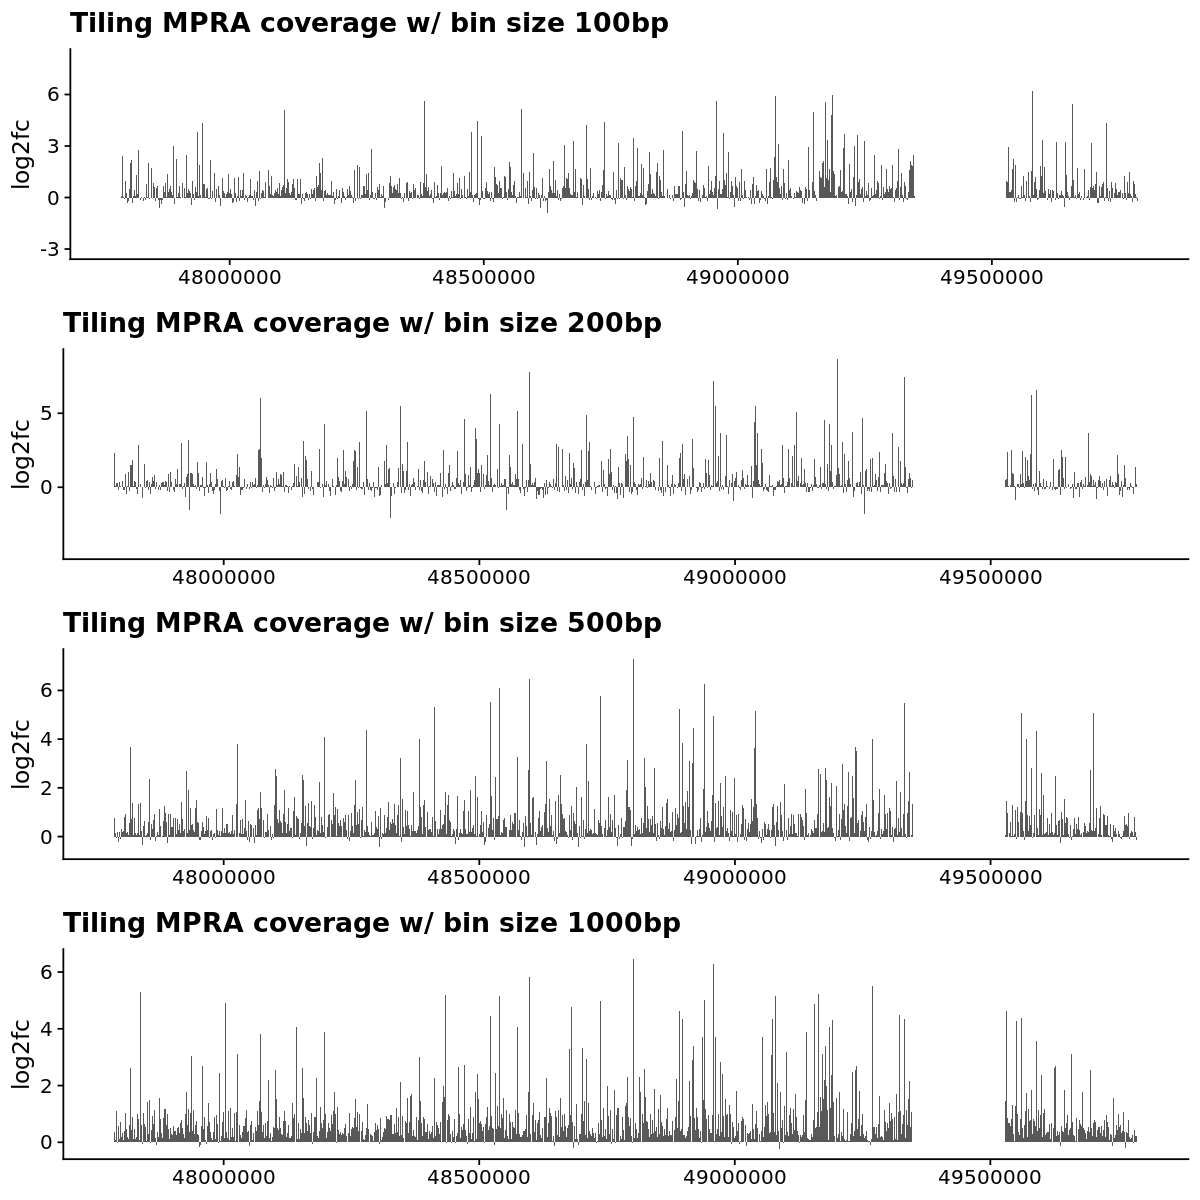

In [56]:
options(repr.plot.height=10, repr.plot.width=10)
plot_grid(plotlist = lst_gpt, ncol=1)

In [57]:
lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]]
    txt = paste0("Tiling MPRA coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start_bin, 
                xmax=End_bin, 
                ymin=0, 
                ymax=2^log2fc)) +
        labs(y="fc", title=txt) +
        theme_cowplot()
    return(gpt)
})

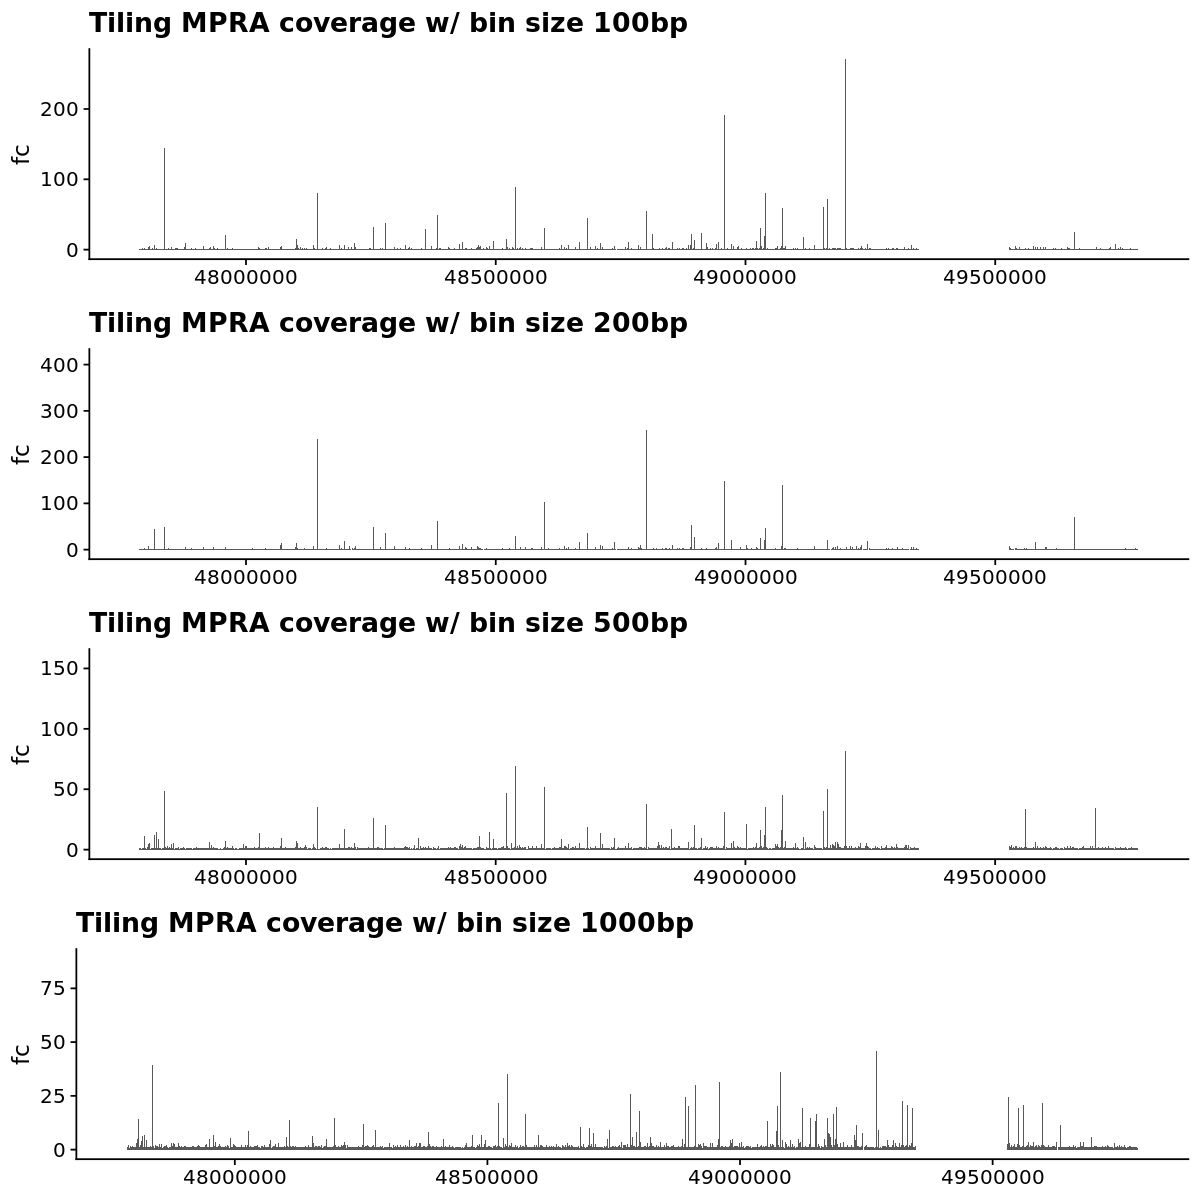

In [58]:
options(repr.plot.height=10, repr.plot.width=10)
plot_grid(plotlist = lst_gpt, ncol=1)

In [59]:
start  = 48780000
end    = 48826000

lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]]
    txt = paste0("Tiling MPRA coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start_bin, 
                xmax=End_bin, 
                ymin=0, 
                ymax=log2fc)) +
        labs(y="log2fc", title=txt) +
        xlim(start, end) +
        theme_cowplot()
    return(gpt)
})

Warning message:
“Removed 17734 rows containing missing values (geom_rect).”
Warning message:
“Removed 8825 rows containing missing values (geom_rect).”
Warning message:
“Removed 3550 rows containing missing values (geom_rect).”
Warning message:
“Removed 1776 rows containing missing values (geom_rect).”


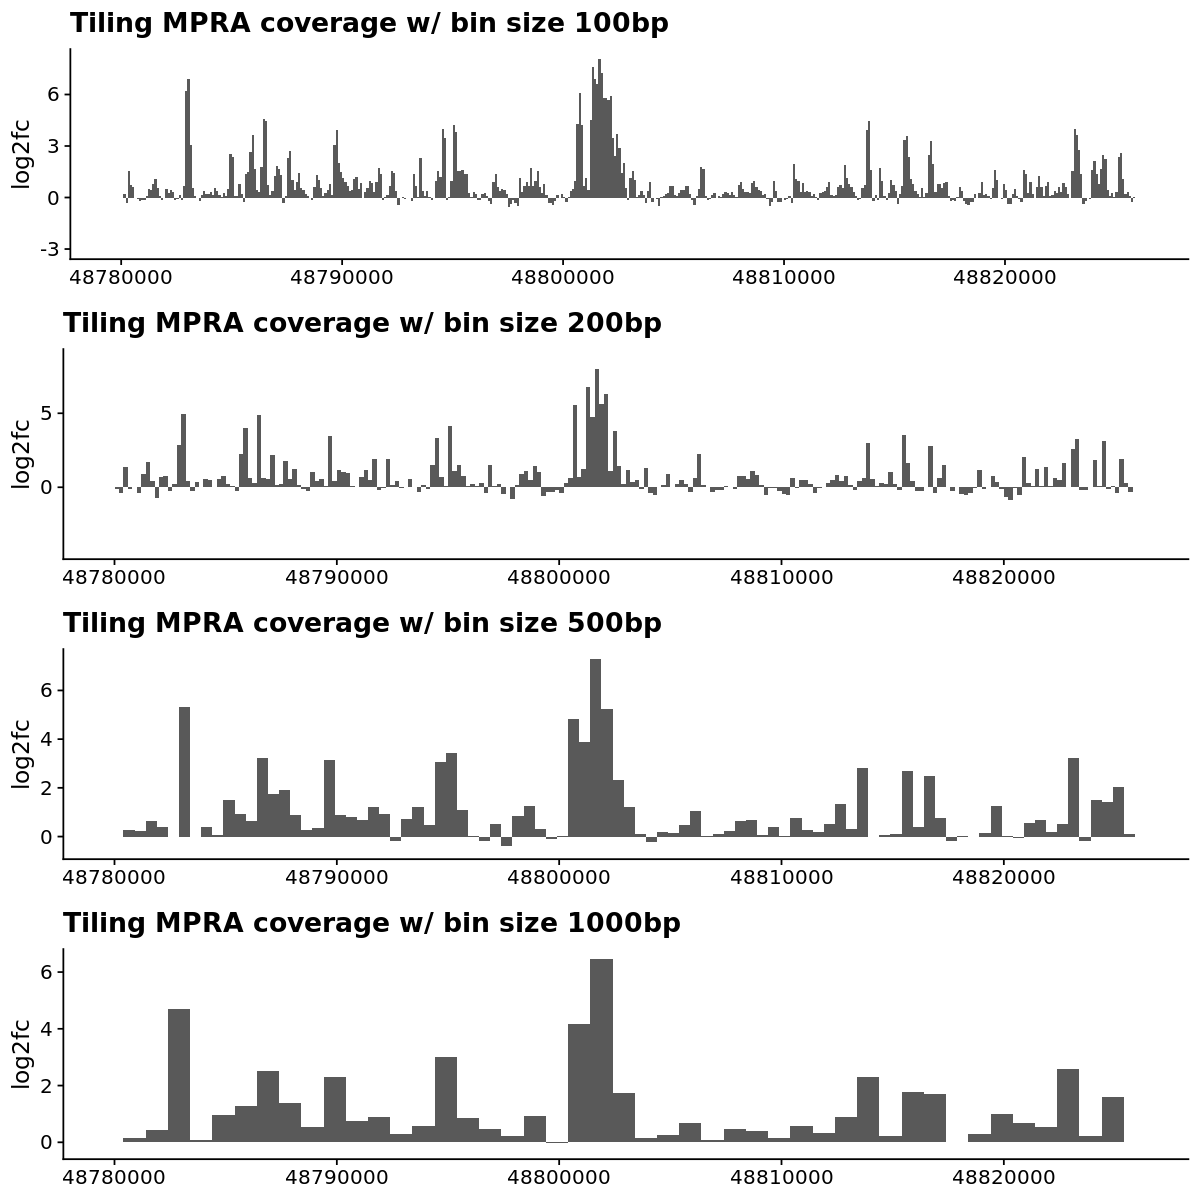

In [60]:
options(repr.plot.height=10, repr.plot.width=10)
plot_grid(plotlist = lst_gpt, ncol=1)

In [62]:
start  = 48780000
end    = 48826000

lst_gpt = lapply(as.character(SIZES), function(size){
    dat = lst_dat[[size]]
    txt = paste0("Tiling MPRA coverage w/ bin size ", size, "bp")
    gpt = ggplot() +
        geom_rect(
            data = dat,
            mapping=aes(
                xmin=Start_bin, 
                xmax=End_bin, 
                ymin=0, 
                ymax=2^log2fc)) +
        labs(y="fc", title=txt) +
        xlim(start, end) +
        theme_cowplot()
    return(gpt)
})

Warning message:
“Removed 17734 rows containing missing values (geom_rect).”
Warning message:
“Removed 8825 rows containing missing values (geom_rect).”
Warning message:
“Removed 3550 rows containing missing values (geom_rect).”
Warning message:
“Removed 1776 rows containing missing values (geom_rect).”


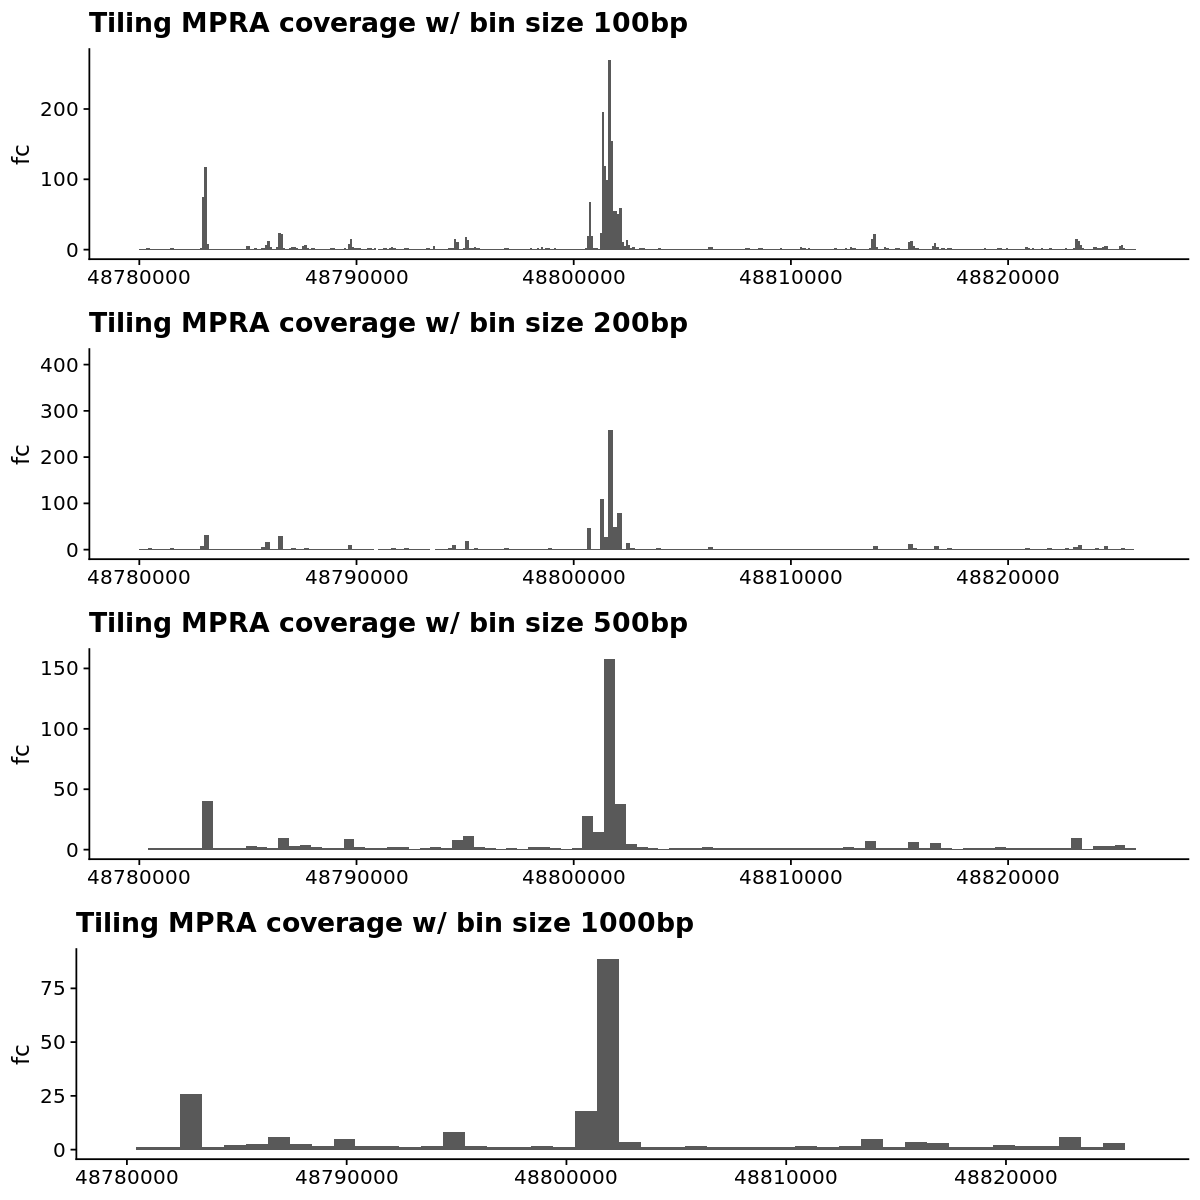

In [63]:
options(repr.plot.height=10, repr.plot.width=10)
plot_grid(plotlist = lst_gpt, ncol=1)

In [26]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_20210130.GATA1.unstranded.bin500.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom_bin", "Start_bin", "End_bin", 
           "Chrom", "Start", "End",
           "Overlap")

dat_bin_5h = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
head(dat_bin_5h)

Chrom_bin,Start_bin,End_bin,Chrom,Start,End,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47786400,47786900,chrX,47786401,47786600,199
chrX,47786400,47786900,chrX,47786451,47786650,199
chrX,47786400,47786900,chrX,47786501,47786700,199
chrX,47786400,47786900,chrX,47786551,47786750,199
chrX,47786400,47786900,chrX,47786601,47786800,199
chrX,47786400,47786900,chrX,47786651,47786850,199


In [8]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_20210130.GATA1.unstranded.bin1000.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom_bin", "Start_bin", "End_bin", 
           "Chrom", "Start", "End",
           "Overlap")

dat_bin_1k = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
head(dat_bin_1k)

Chrom_bin,Start_bin,End_bin,Chrom,Start,End,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47786400,47787400,chrX,47786401,47786600,199
chrX,47786400,47787400,chrX,47786451,47786650,199
chrX,47786400,47787400,chrX,47786501,47786700,199
chrX,47786400,47787400,chrX,47786551,47786750,199
chrX,47786400,47787400,chrX,47786601,47786800,199
chrX,47786400,47787400,chrX,47786651,47786850,199


In [9]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_20210130.GATA1.unstranded.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

dat_mpra = dat
head(dat_mpra)

Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.787,10474.869,112.1126526,110.93113079,0.10214790,47786500
chrX,47786451,47786650,X:47786451-47786650,.,+,0.78305606,1386.007,2387.119,11.3173884,10.64251685,0.11330705,47786550
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.626,1788.236,0.8450697,0.62872262,0.08785968,47786600
chrX,47786551,47786750,X:47786551-47786750,.,+,0.58829515,2388.997,3591.264,11.2404554,10.56667887,0.08543661,47786650
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.916,2202.385,0.3095900,0.21047015,0.09667741,47786700
chrX,47786651,47786850,X:47786651-47786850,.,+,-0.02967703,1571.259,1537.475,0.1009399,0.06453099,0.11287406,47786750


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



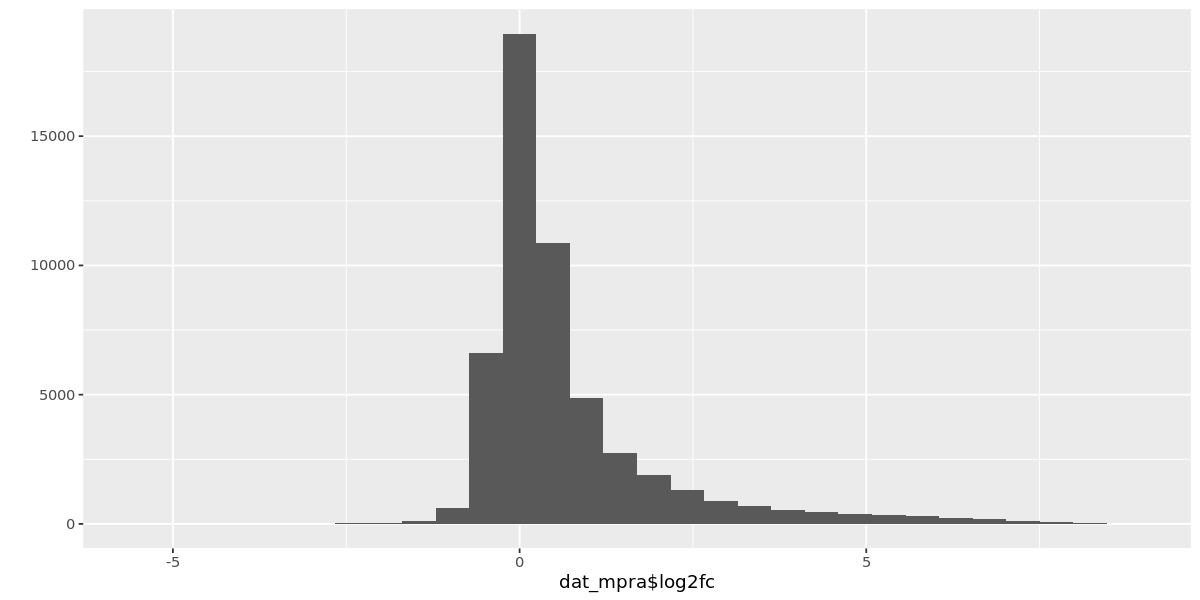

In [45]:
qplot(dat_mpra$log2fc)

In [46]:
range(dat_mpra$log2fc)

[1] -5.120847  8.917605

In [38]:
log2(214216.5070/758.6521008)

[1] 8.141415

In [36]:
log2(37.2283+1)

[1] 5.256569

In [41]:
idx = which(dat_mpra$ID == "X:48782951-48783150")
idx

[1] 25861

In [42]:
dat_mpra[idx,]

Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,48782951,48783150,X:48782951-48783150,.,+,8.178405,0,37.2283,15.41148,14.68486,1.00443,48783050


In [34]:
dat_mpra %>% dplyr::filter(log2fc>8)

Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,48433851,48434050,X:48433851-48434050,.,+,8.685850,205.7803482,84764.4769,1000.00000,1000.00000,0.1029743,48433950
chrX,48574321,48574520,X:48574321-48574520,.,+,8.249343,897.9059945,273237.1677,1000.00000,1000.00000,0.1203600,48574420
chrX,48574341,48574540,X:48574341-48574540,.,+,8.141343,758.6521008,214216.5070,1000.00000,1000.00000,0.1081785,48574440
chrX,48782951,48783150,X:48782951-48783150,.,+,8.178405,0.0000000,37.2283,15.41148,14.68486,1.0044298,48783050
chrX,48801501,48801700,X:48801501-48801700,.,+,8.265900,1.1091959,344.9355,52.50488,51.53026,0.5382117,48801600
chrX,48801551,48801750,X:48801551-48801750,.,+,8.164295,280.9521906,80613.3254,1000.00000,1000.00000,0.1094498,48801650
chrX,48801571,48801770,X:48801571-48801770,.,+,8.214416,113.5258560,33710.4954,1000.00000,1000.00000,0.1185785,48801670
chrX,48801581,48801780,X:48801581-48801780,.,+,8.409993,40.7005977,13843.0362,1000.00000,1000.00000,0.1372684,48801680
chrX,48801591,48801790,X:48801591-48801790,.,+,8.118564,40.8270438,11348.3376,1000.00000,1000.00000,0.1438957,48801690


In [10]:
dat_val = dat_mpra %>% dplyr::select(Chrom, Start, End, log2fc)
head(dat_val)

Chrom,Start,End,log2fc
<chr>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,2.30593934
chrX,47786451,47786650,0.78305606
chrX,47786501,47786700,-0.12873196
chrX,47786551,47786750,0.58829515
chrX,47786601,47786800,0.06670014
chrX,47786651,47786850,-0.02967703


In [12]:
dat_bin = dat_bin_1h
dat = left_join(dat_bin, dat_val, by = c("Chrom", "Start", "End"))
dat = dat %>% 
    group_by(Chrom_bin, Start_bin, End_bin) %>% 
    summarise(Value = mean(log2fc), .groups="drop")
head(dat)

Chrom_bin,Start_bin,End_bin,Value
<chr>,<dbl>,<dbl>,<dbl>
chrX,47786500,47786600,1.54449770
chrX,47786600,47786700,0.22978159
chrX,47786700,47786800,0.01851156
chrX,47786800,47786900,-0.11467226
chrX,47786900,47787000,-0.07043975
chrX,47787000,47787100,-0.03205990


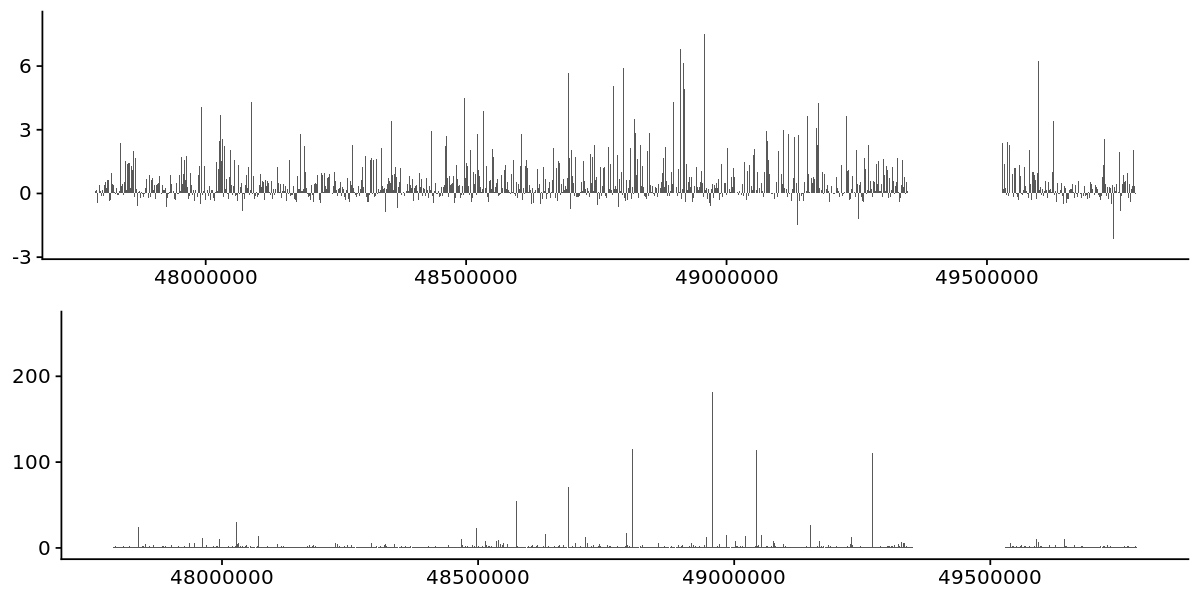

In [16]:
gp1 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=Value)) +
    theme_cowplot()

gp2 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=2^Value)) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=10)
plot_grid(gp1, gp2, nrow=2)

chrX:48780000-48826000

Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”


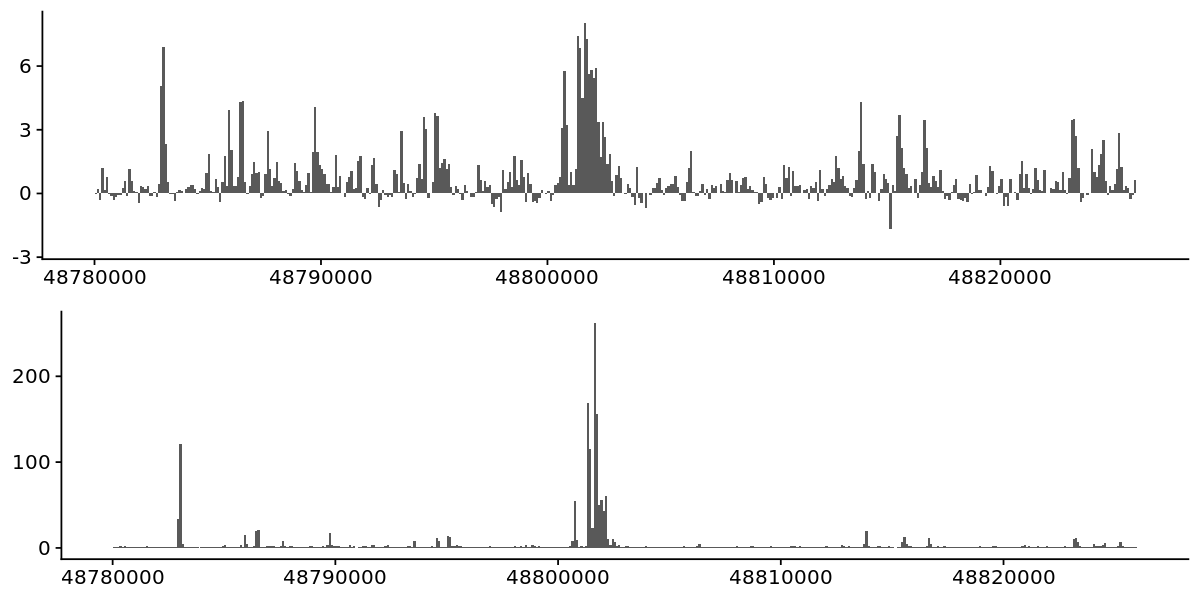

In [18]:
start  = 48780000
end    = 48826000

gp1 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=Value)) +
    xlim(start, end) +
    theme_cowplot()

gp2 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=2^Value)) +
    xlim(start, end) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=10)
plot_grid(gp1, gp2, nrow=2)

In [27]:
dat_bin = dat_bin_5h
dat = left_join(dat_bin, dat_val, by = c("Chrom", "Start", "End"))
dat = dat %>% 
    group_by(Chrom_bin, Start_bin, End_bin) %>% 
    summarise(Value = mean(log2fc), .groups="drop")
head(dat)

Chrom_bin,Start_bin,End_bin,Value
<chr>,<dbl>,<dbl>,<dbl>
chrX,47786400,47786900,0.49211849
chrX,47786900,47787400,-0.06046902
chrX,47787400,47787900,-0.20944726
chrX,47787900,47788400,0.12536675
chrX,47788400,47788900,0.13320053
chrX,47788900,47789400,2.94764891


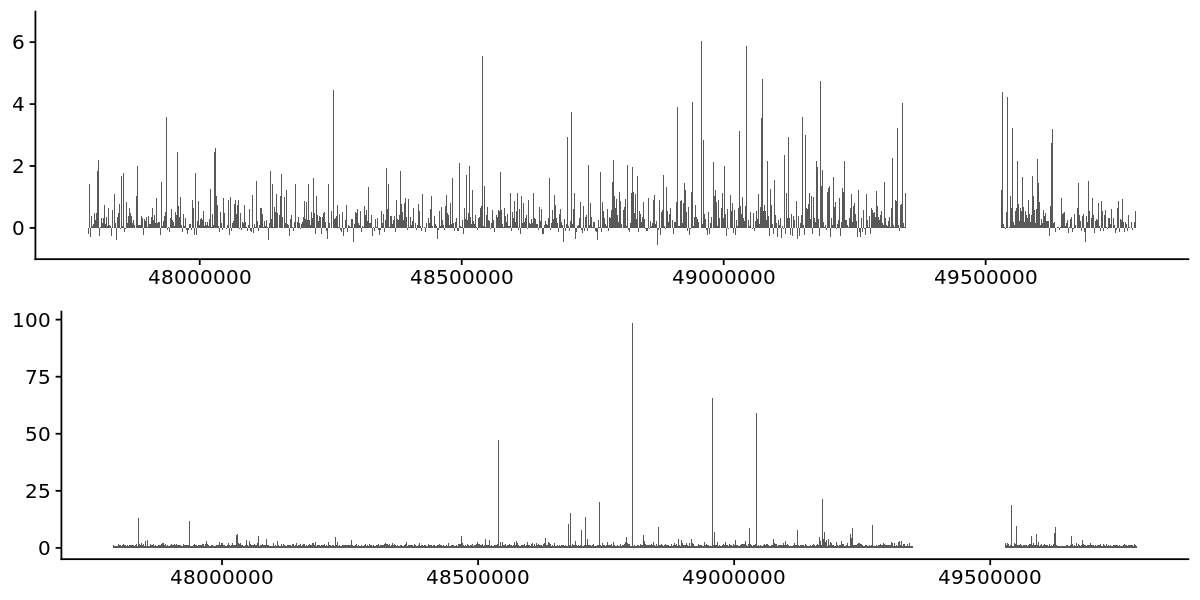

In [28]:
gp1 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=Value)) +
    theme_cowplot()

gp2 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=2^Value)) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=10)
plot_grid(gp1, gp2, nrow=2)

Warning message:
“Removed 3550 rows containing missing values (geom_rect).”
Warning message:
“Removed 3550 rows containing missing values (geom_rect).”


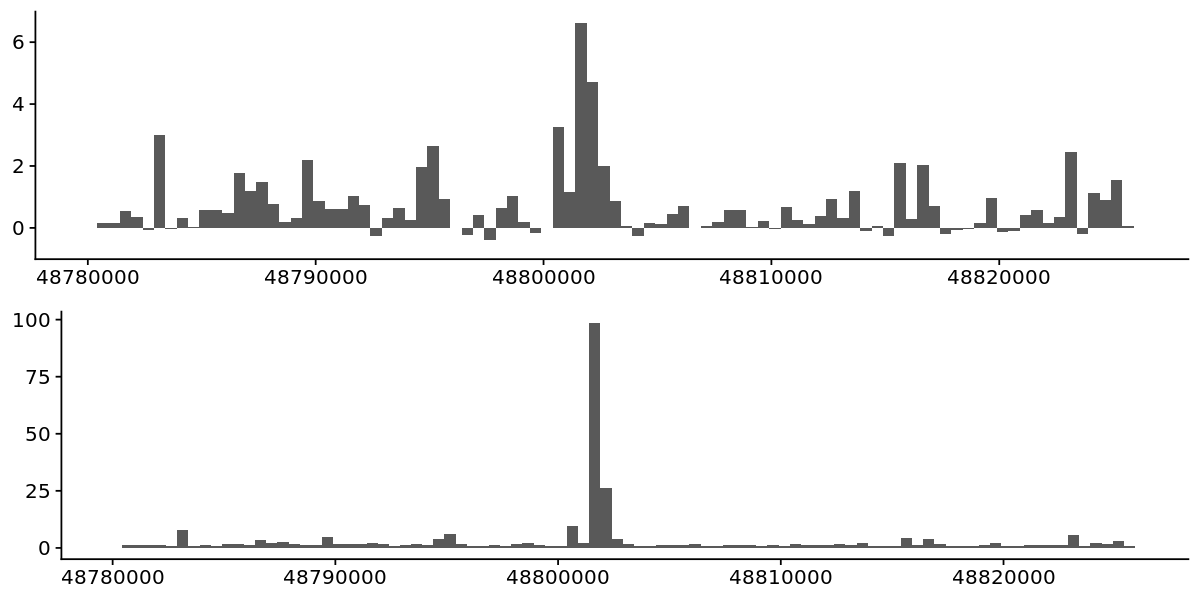

In [29]:
start  = 48780000
end    = 48826000

gp1 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=Value)) +
    xlim(start, end) +
    theme_cowplot()

gp2 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=2^Value)) +
    xlim(start, end) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=10)
plot_grid(gp1, gp2, nrow=2)

In [19]:
dat_bin = dat_bin_1k
dat = left_join(dat_bin, dat_val, by = c("Chrom", "Start", "End"))
dat = dat %>% 
    group_by(Chrom_bin, Start_bin, End_bin) %>% 
    summarise(Value = mean(log2fc), .groups="drop")
head(dat)

Chrom_bin,Start_bin,End_bin,Value
<chr>,<dbl>,<dbl>,<dbl>
chrX,47786400,47787400,0.164239679
chrX,47787400,47788400,0.025513661
chrX,47788400,47789400,1.270901150
chrX,47789400,47790400,0.535351574
chrX,47790400,47791400,0.005742295
chrX,47791400,47792400,-0.156421986


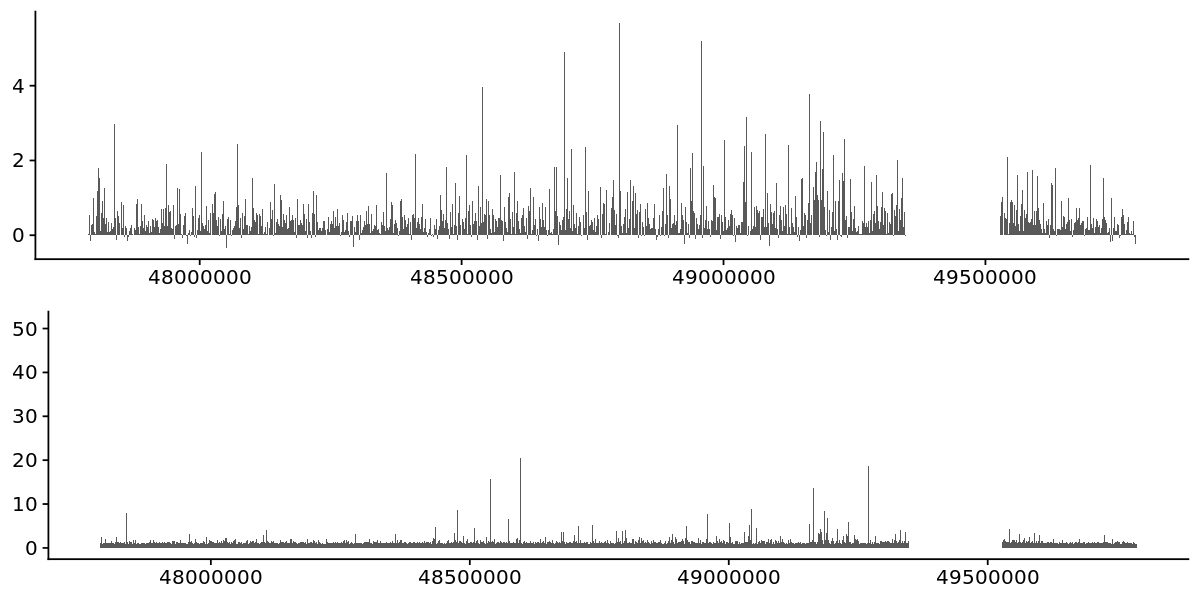

In [20]:
gp1 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=Value)) +
    theme_cowplot()

gp2 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=2^Value)) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=10)
plot_grid(gp1, gp2, nrow=2)

Warning message:
“Removed 1776 rows containing missing values (geom_rect).”
Warning message:
“Removed 1776 rows containing missing values (geom_rect).”


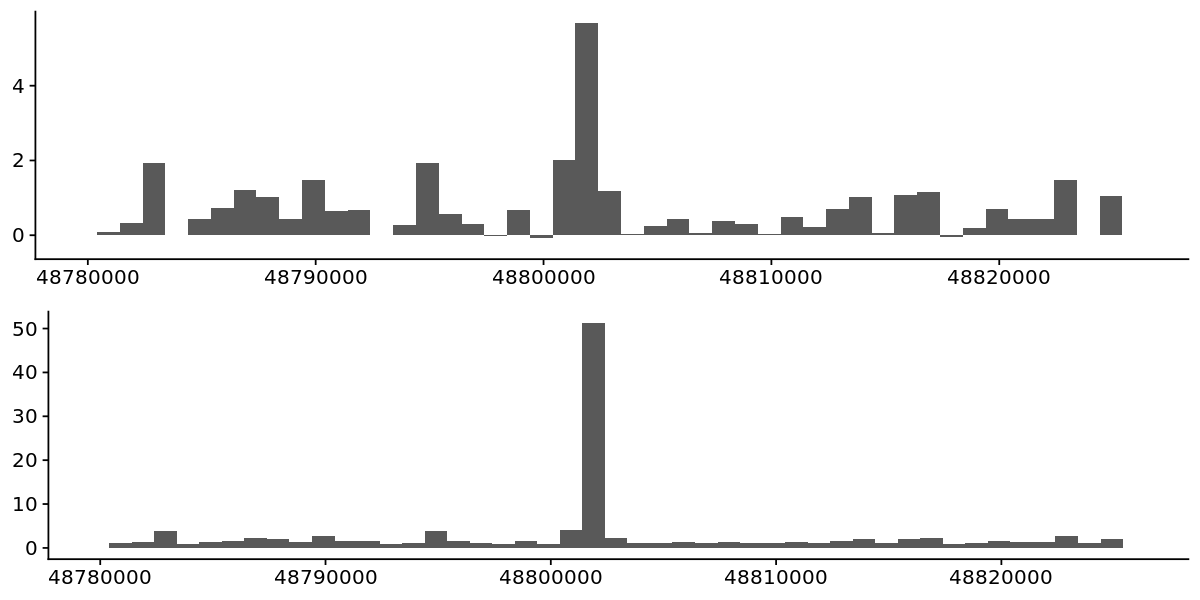

In [21]:
start  = 48780000
end    = 48826000

gp1 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=Value)) +
    xlim(start, end) +
    theme_cowplot()

gp2 = ggplot() +
    geom_rect(
        data = dat,
        mapping=aes(
            xmin=Start_bin, 
            xmax=End_bin, 
            ymin=0, 
            ymax=2^Value)) +
    xlim(start, end) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=10)
plot_grid(gp1, gp2, nrow=2)

In [67]:
dat = dat_mpra
dat = dat %>% mutate(Loc = (Start + End) / 2)

gpt = ggplot(dat, aes(x=Loc, y=exp(log2fc))) + 
    geom_line(size=0.05) + 
    geom_point(size=0.1) + 
    theme_cowplot()

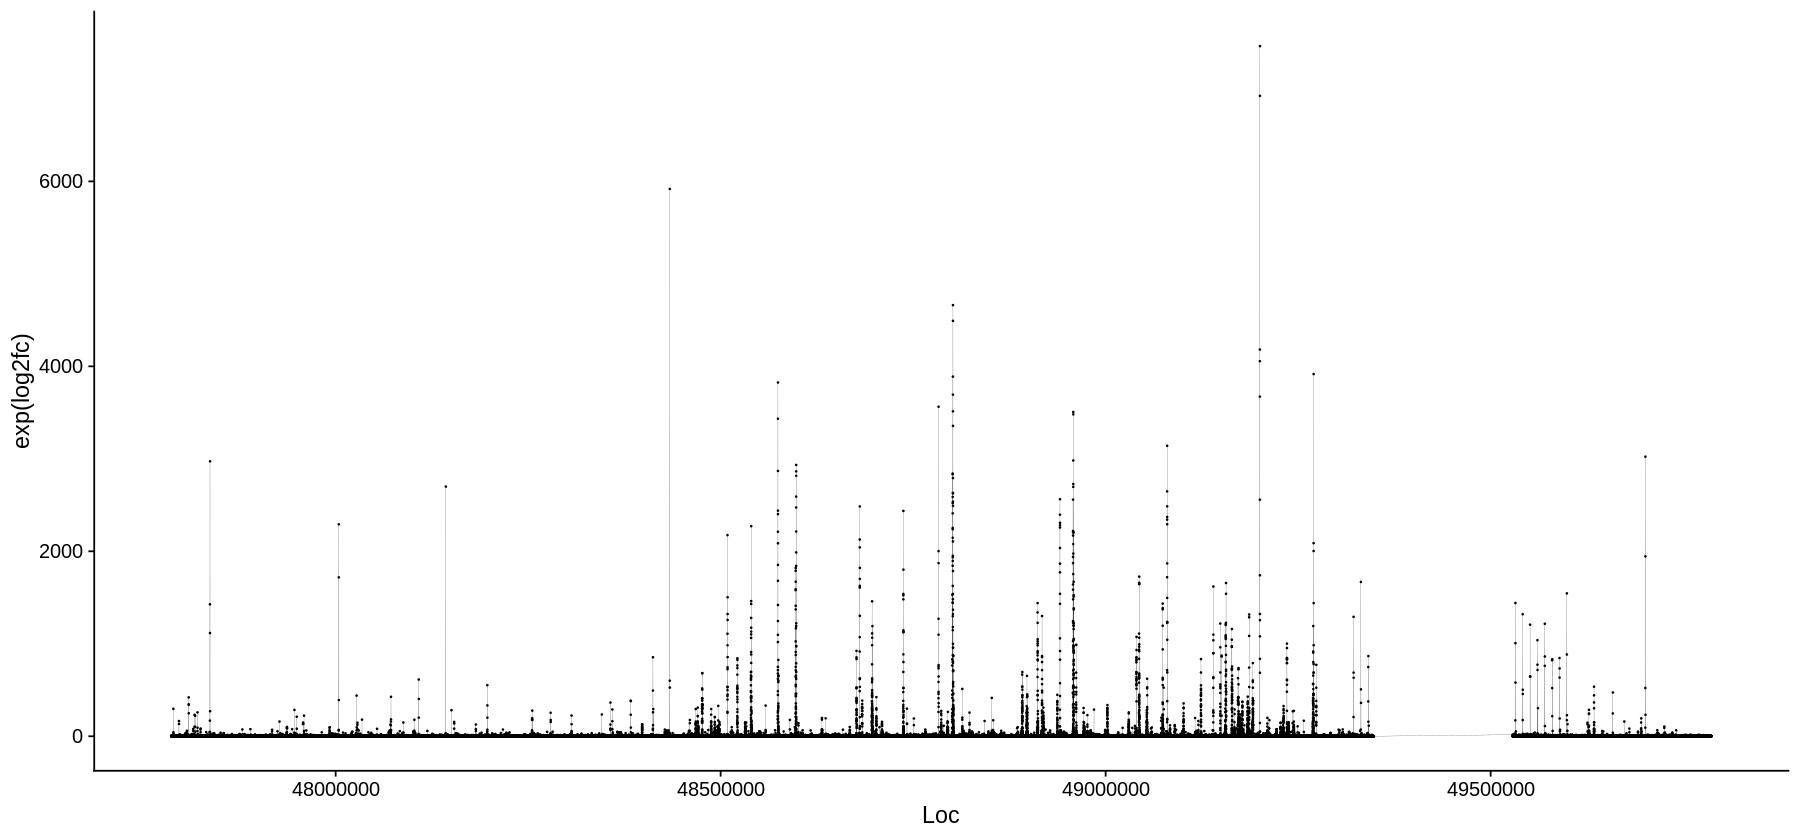

In [68]:
options(repr.plot.width=15, repr.plot.heigth=4)
print(gpt)

Warning message:
“Removed 52267 rows containing missing values (geom_point).”


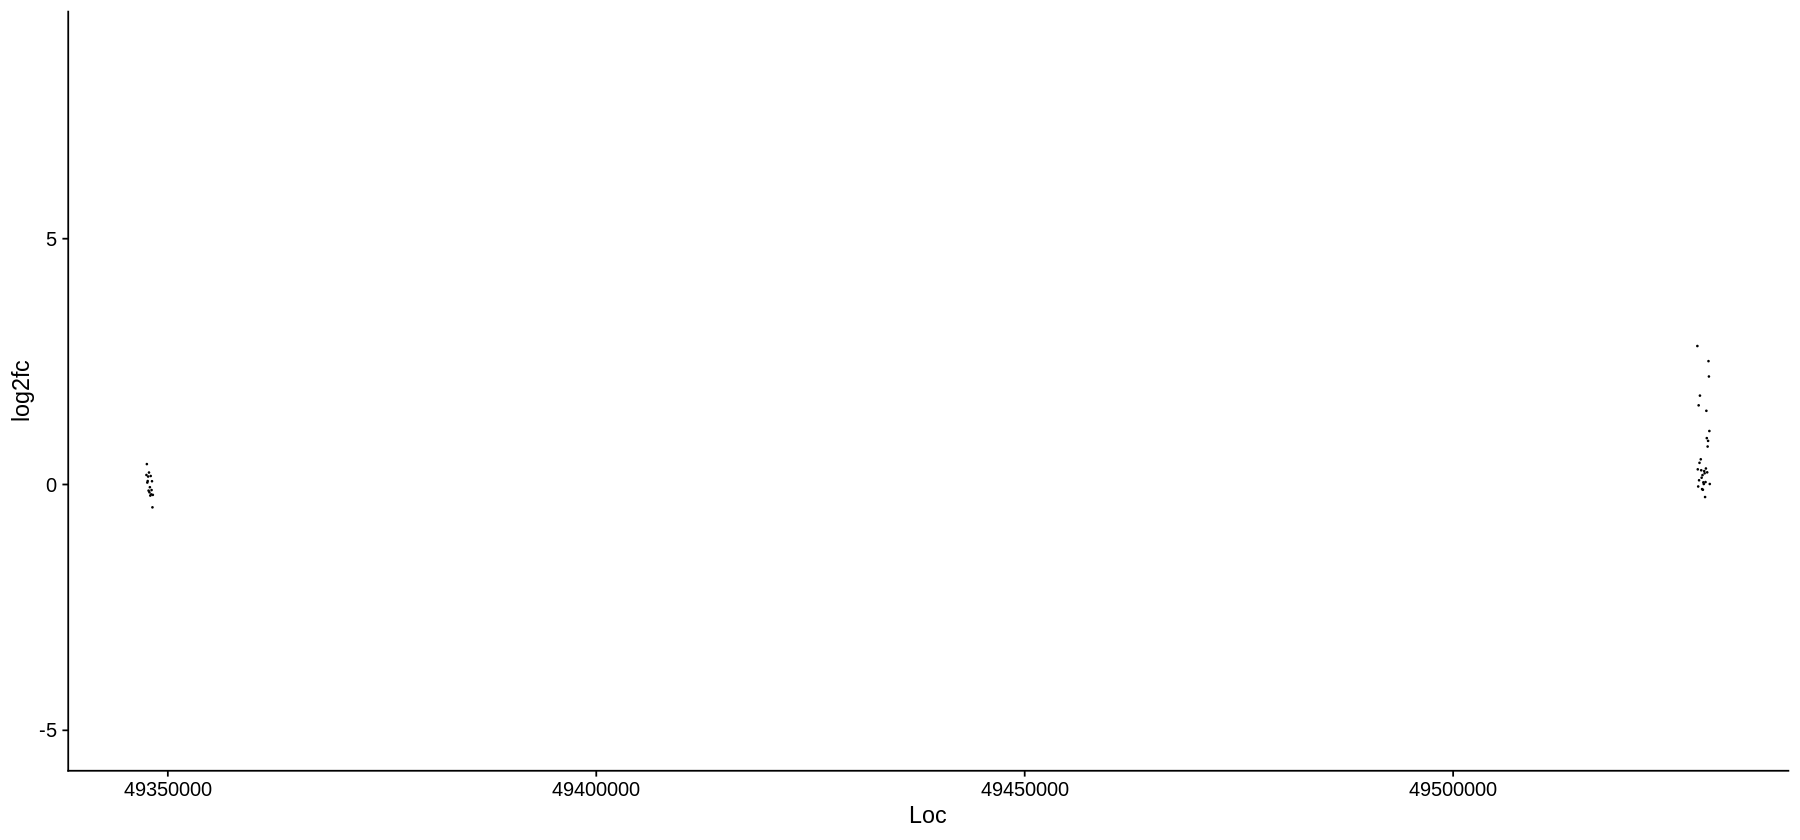

In [76]:
dat = dat_mpra
dat = dat %>% mutate(Loc = (Start + End) / 2)

gpt = ggplot(dat, aes(x=Loc, y=log2fc)) + 
    geom_point(size=0.1) + 
    theme_cowplot() + xlim(49347500, 49530000)

options(repr.plot.width=15, repr.plot.heigth=4)
print(gpt)

In [70]:
dat = dat_mpra
dat = dat %>% mutate(Loc = (Start + End) / 2)

tmp = dat %>% dplyr::filter(Loc > 49348000, Loc < 49529000)
tmp

chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,49347901,49348100,X:49347901-49348100,.,+,0.17348955,526.301527,593.75739,0.6203219,0.44736379,0.14755987,49348000
chrX,49347951,49348150,X:49347951-49348150,.,+,-0.20054161,1249.345825,1086.52900,1.1724797,0.90239496,0.10957494,49348050
chrX,49348001,49348200,X:49348001-49348200,.,+,-0.11281952,734.304457,678.58691,0.4752572,0.33419425,0.11696520,49348100
chrX,49348051,49348250,X:49348051-49348250,.,+,0.06709130,182.509987,190.76572,0.1063843,0.06826882,0.24330082,49348150
chrX,49348101,49348300,X:49348101-49348300,.,+,-0.46426447,313.035046,227.91510,1.7335314,1.39304615,0.19705144,49348200
chrX,49348151,49348350,X:49348151-49348350,.,+,-0.21095647,759.159440,656.75031,0.8682440,0.64797845,0.14129907,49348250
chrX,49528401,49528600,X:49528401-49528600,.,+,2.81710500,1818.297455,12817.03270,257.9596924,256.49177083,0.08199446,49528500
chrX,49528451,49528650,X:49528451-49528650,.,+,0.30911606,1396.458849,1728.26079,2.3367590,1.94036228,0.10909601,49528550
chrX,49528501,49528700,X:49528501-49528700,.,+,-0.04017608,1648.705298,1603.55793,0.1874573,0.12305565,0.08838985,49528600


jump from `49,348,151` to `49,528,401`

## Check the original data

In [74]:
fdiry = file.path(FD_RES, "source", "mpra")
fname = "GATA-MYC_Tile_K562_K562_20210130.hg38.bed"
fpath = file.path(fdiry, fname)

cnames = c("chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

dat = read_tsv(fpath)
colnames(dat) = cnames
dat = dat %>% mutate(Loc = (Start + End) / 2)

dat_mpra_ori = dat
head(dat_mpra_ori)

Rows: 99875 Columns: 12
── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chr, id, score, strand
dbl (8): start, stop, log2fc, input-count, output-count, log10pval, log10fdr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,1:10437778:C:T:R:wC,.,+,2.3864209,883.0929,4616.0826,106.7371382,105.5726804,0.10837262,NA
1,NA,NA,1:10451799:C:T:R:wC,.,+,0.1632697,404.4490,452.6180,0.6953862,0.5069747,0.12786974,NA
1,NA,NA,1:110198727:C:G:R:wC,.,+,6.8942454,310.5452,36945.0097,Inf,Inf,0.10442677,NA
1,NA,NA,1:110881742:NA:NA,.,+,5.2284849,616.3812,23111.0120,Inf,Inf,0.09590843,NA
1,NA,NA,1:111838694:C:T:R:wC,.,+,6.3593775,322.7433,26498.6023,Inf,Inf,0.08644483,NA
1,NA,NA,1:113047064:NA:NA,.,+,0.1146690,915.5454,990.3427,0.5316370,0.3776899,0.10927472,NA


In [75]:
dat = dat_mpra_ori
dat = dat %>% dplyr::filter(Loc > 49348000, Loc < 49529000)
dat

chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,49347901,49348100,X:49347901-49348100,.,+,0.17348955,526.301527,593.75739,0.6203219,0.44736379,0.14755987,49348000
X,49347951,49348150,X:49347951-49348150,.,+,-0.20054161,1249.345825,1086.52900,1.1724797,0.90239496,0.10957494,49348050
X,49348001,49348200,X:49348001-49348200,.,+,-0.11281952,734.304457,678.58691,0.4752572,0.33419425,0.11696520,49348100
X,49348051,49348250,X:49348051-49348250,.,+,0.06709130,182.509987,190.76572,0.1063843,0.06826882,0.24330082,49348150
X,49348101,49348300,X:49348101-49348300,.,+,-0.46426447,313.035046,227.91510,1.7335314,1.39304615,0.19705144,49348200
X,49348151,49348350,X:49348151-49348350,.,+,-0.21095647,759.159440,656.75031,0.8682440,0.64797845,0.14129907,49348250
X,49528401,49528600,X:49528401-49528600,.,+,2.81710500,1818.297455,12817.03270,257.9596924,256.49177083,0.08199446,49528500
X,49528451,49528650,X:49528451-49528650,.,+,0.30911606,1396.458849,1728.26079,2.3367590,1.94036228,0.10909601,49528550
X,49528501,49528700,X:49528501-49528700,.,+,-0.04017608,1648.705298,1603.55793,0.1874573,0.12305565,0.08838985,49528600
